# Data Cleaning

In [5]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20, 10)

In [6]:
df1 = pd.read_csv("Bengaluru_House_Data.csv")
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [7]:
df1.shape

(13320, 9)

In [8]:
df1.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [9]:
df2 = df1.drop(['society'],axis='columns')
df2.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200,2.0,1.0,51.00


In [10]:
df2.isnull().sum()

area_type         0
availability      0
location          1
size             16
total_sqft        0
bath             73
balcony         609
price             0
dtype: int64

In [11]:
df3 = df2.dropna()
df3.isnull().sum()

area_type       0
availability    0
location        0
size            0
total_sqft      0
bath            0
balcony         0
price           0
dtype: int64

In [12]:
df3['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '3 Bedroom', '1 BHK', '1 RK',
       '4 BHK', '1 Bedroom', '2 Bedroom', '6 Bedroom', '8 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '11 Bedroom', '43 Bedroom',
       '14 BHK', '8 BHK', '12 Bedroom', '10 Bedroom', '13 BHK'],
      dtype=object)

In [13]:
df3['bhk'] = df3['size'].apply(lambda x: int(x.split(' ')[0]))

C:\Users\19IT4\AppData\Local\Temp/ipykernel_3188/2222900254.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['bhk'] = df3['size'].apply(lambda x: int(x.split(' ')[0]))


In [14]:
df3.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price,bhk
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07,2
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00,4
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440,2.0,3.0,62.00,3
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00,3
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200,2.0,1.0,51.00,2


In [15]:
df3['bhk'].unique()

array([ 2,  4,  3,  1,  6,  8,  7,  5, 11,  9, 27, 43, 14, 12, 10, 13],
      dtype=int64)

In [16]:
df3[df3.bhk>20]

,area_type,availability,location,size,total_sqft,bath,balcony,price,bhk
1718,Super built-up Area,Ready To Move,2Electronic City Phase II,27 BHK,8000,27.0,0.0,230.0,27
4684,Plot Area,Ready To Move,Munnekollal,43 Bedroom,2400,40.0,0.0,660.0,43


In [17]:
df3.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [18]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [19]:
df3[~df3['total_sqft'].apply(is_float)]

,area_type,availability,location,size,total_sqft,bath,balcony,price,bhk
30,Super built-up Area,19-Dec,Yelahanka,4 BHK,2100 - 2850,4.0,0.0,186.000,4
122,Super built-up Area,18-Mar,Hebbal,4 BHK,3067 - 8156,4.0,0.0,477.000,4
137,Super built-up Area,19-Mar,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,0.0,54.005,2
165,Super built-up Area,18-Dec,Sarjapur,2 BHK,1145 - 1340,2.0,0.0,43.490,2
188,Super built-up Area,Ready To Move,KR Puram,2 BHK,1015 - 1540,2.0,0.0,56.800,2
...,...,...,...,...,...,...,...,...,...
12975,Super built-up Area,20-Aug,Whitefield,2 BHK,850 - 1060,2.0,0.0,38.190,2
12990,Super built-up Area,18-May,Talaghattapura,3 BHK,1804 - 2273,3.0,0.0,122.000,3
13059,Super built-up Area,Ready To Move,Harlur,2 BHK,1200 - 1470,2.0,0.0,72.760,2
13265,Super built-up Area,20-Sep,Hoodi,2 BHK,1133 - 1384,2.0,0.0,59.135,2


In [20]:
def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

In [21]:
convert_sqft_to_num('2346')

2346.0

In [22]:
convert_sqft_to_num('2100 - 2850')

2475.0

In [23]:
df4 = df3.copy()
df4['total_sqft'] = df4['total_sqft'].apply(convert_sqft_to_num)
df4.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price,bhk
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2


In [24]:
df4.loc[30]

area_type       Super built-up  Area
availability                  19-Dec
location                   Yelahanka
size                           4 BHK
total_sqft                    2475.0
bath                             4.0
balcony                          0.0
price                          186.0
bhk                                4
Name: 30, dtype: object

In [25]:
df3.head(50)

,area_type,availability,location,size,total_sqft,bath,balcony,price,bhk
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07,2
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00,4
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440,2.0,3.0,62.00,3
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00,3
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200,2.0,1.0,51.00,2
5,Super built-up Area,Ready To Move,Whitefield,2 BHK,1170,2.0,1.0,38.00,2
8,Super built-up Area,Ready To Move,Marathahalli,3 BHK,1310,3.0,1.0,63.25,3
10,Super built-up Area,18-Feb,Whitefield,3 BHK,1800,2.0,2.0,70.00,3
11,Plot Area,Ready To Move,Whitefield,4 Bedroom,2785,5.0,3.0,295.00,4
12,Super built-up Area,Ready To Move,7th Phase JP Nagar,2 BHK,1000,2.0,1.0,38.00,2


# Feature Engineering

In [26]:
df5 = df4.copy()
df5['price_per_sqft'] = df5['price']*100000/df5['total_sqft']
df5.head(50)

,area_type,availability,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056.00,2.0,1.0,39.07,2,3699.810606
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600.00,5.0,3.0,120.00,4,4615.384615
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440.00,2.0,3.0,62.00,3,4305.555556
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521.00,3.0,1.0,95.00,3,6245.890861
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200.00,2.0,1.0,51.00,2,4250.000000
5,Super built-up Area,Ready To Move,Whitefield,2 BHK,1170.00,2.0,1.0,38.00,2,3247.863248
8,Super built-up Area,Ready To Move,Marathahalli,3 BHK,1310.00,3.0,1.0,63.25,3,4828.244275
10,Super built-up Area,18-Feb,Whitefield,3 BHK,1800.00,2.0,2.0,70.00,3,3888.888889
11,Plot Area,Ready To Move,Whitefield,4 Bedroom,2785.00,5.0,3.0,295.00,4,10592.459605
12,Super built-up Area,Ready To Move,7th Phase JP Nagar,2 BHK,1000.00,2.0,1.0,38.00,2,3800.000000


In [27]:
len(df5.location.unique())
df5.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2,3699.810606
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4,4615.384615
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3,4305.555556
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3,6245.890861
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2,4250.000000


In [28]:
#df3['bhk'] = df3['size'].apply(lambda x: int(x.split(' ')[0]))
count=0
for i in df5['location'] :
    s=i
    if s[0]==' ' :
        count+=1
print(count)

40


In [29]:
df5.location=df5.location.apply(lambda x: x.strip())
location_stats = df5.groupby('location')['location'].agg('count')
location_stats

location
1 Annasandrapalya                                  1
1 Giri Nagar                                       1
1 Ramamurthy Nagar                                 1
12th cross srinivas nagar banshankari 3rd stage    1
1A Block Koramangala                               1
                                                  ..
south                                              2
t.c palya                                          1
tc.palya                                           4
vinayakanagar                                      1
whitefiled                                         1
Name: location, Length: 1254, dtype: int64

In [30]:
len(location_stats[location_stats<=10])

1017

In [31]:
location_stats_less_than_10 = location_stats[location_stats<=10]
location_stats_less_than_10

location
1 Annasandrapalya                                  1
1 Giri Nagar                                       1
1 Ramamurthy Nagar                                 1
12th cross srinivas nagar banshankari 3rd stage    1
1A Block Koramangala                               1
                                                  ..
south                                              2
t.c palya                                          1
tc.palya                                           4
vinayakanagar                                      1
whitefiled                                         1
Name: location, Length: 1017, dtype: int64

In [32]:
len(df5.location.unique())

1254

In [33]:
df5.location = df5.location.apply(lambda x: 'other' if x in location_stats_less_than_10 else x)
len(df5.location.unique())

238

In [34]:
df5.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2,3699.810606
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4,4615.384615
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3,4305.555556
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3,6245.890861
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2,4250.000000


# Outlier Removal

In [35]:
df5[df5.total_sqft/df5.bhk<300].head()

,area_type,availability,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
58,Plot Area,Ready To Move,Murugeshpalya,6 Bedroom,1407.0,4.0,1.0,150.0,6,10660.980810
68,Plot Area,Ready To Move,Devarachikkanahalli,8 Bedroom,1350.0,7.0,0.0,85.0,8,6296.296296
70,Plot Area,Ready To Move,other,3 Bedroom,500.0,3.0,2.0,100.0,3,20000.000000
78,Built-up Area,Ready To Move,Kaval Byrasandra,2 BHK,460.0,1.0,0.0,22.0,2,4782.608696
89,Plot Area,Ready To Move,Rajaji Nagar,6 Bedroom,710.0,6.0,3.0,160.0,6,22535.211268


In [36]:
df5.head(60)

,area_type,availability,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056.00,2.0,1.0,39.07,2,3699.810606
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600.00,5.0,3.0,120.00,4,4615.384615
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440.00,2.0,3.0,62.00,3,4305.555556
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521.00,3.0,1.0,95.00,3,6245.890861
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200.00,2.0,1.0,51.00,2,4250.000000
5,Super built-up Area,Ready To Move,Whitefield,2 BHK,1170.00,2.0,1.0,38.00,2,3247.863248
8,Super built-up Area,Ready To Move,Marathahalli,3 BHK,1310.00,3.0,1.0,63.25,3,4828.244275
10,Super built-up Area,18-Feb,Whitefield,3 BHK,1800.00,2.0,2.0,70.00,3,3888.888889
11,Plot Area,Ready To Move,Whitefield,4 Bedroom,2785.00,5.0,3.0,295.00,4,10592.459605
12,Super built-up Area,Ready To Move,7th Phase JP Nagar,2 BHK,1000.00,2.0,1.0,38.00,2,3800.000000


# Outlier Removal

In [37]:
df5.shape

(12710, 10)

In [38]:
df6 = df5[~(df5.total_sqft/df5.bhk<300)]
df6.shape

(12055, 10)

In [39]:
df6.price_per_sqft.describe()

count     12013.000000
mean       6206.082347
std        3985.518807
min         267.829813
25%        4199.363057
50%        5252.525253
75%        6823.529412
max      176470.588235
Name: price_per_sqft, dtype: float64

In [40]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m=np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out, reduced_df],ignore_index=True)
    return df_out
df7 = remove_pps_outliers(df6)
df7[(df7.location=="Nagarbhavi")].head()

,area_type,availability,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
4976,Built-up Area,Ready To Move,Nagarbhavi,3 BHK,1630.0,2.0,1.0,98.0,3,6012.269939
4977,Plot Area,Ready To Move,Nagarbhavi,3 Bedroom,1350.0,3.0,2.0,150.0,3,11111.111111
4978,Plot Area,Ready To Move,Nagarbhavi,2 Bedroom,1200.0,2.0,1.0,150.0,2,12500.000000
4979,Super built-up Area,Ready To Move,Nagarbhavi,3 BHK,1523.0,2.0,2.0,53.4,3,3506.237689
4980,Built-up Area,Ready To Move,Nagarbhavi,3 Bedroom,2400.0,3.0,0.0,160.0,3,6666.666667


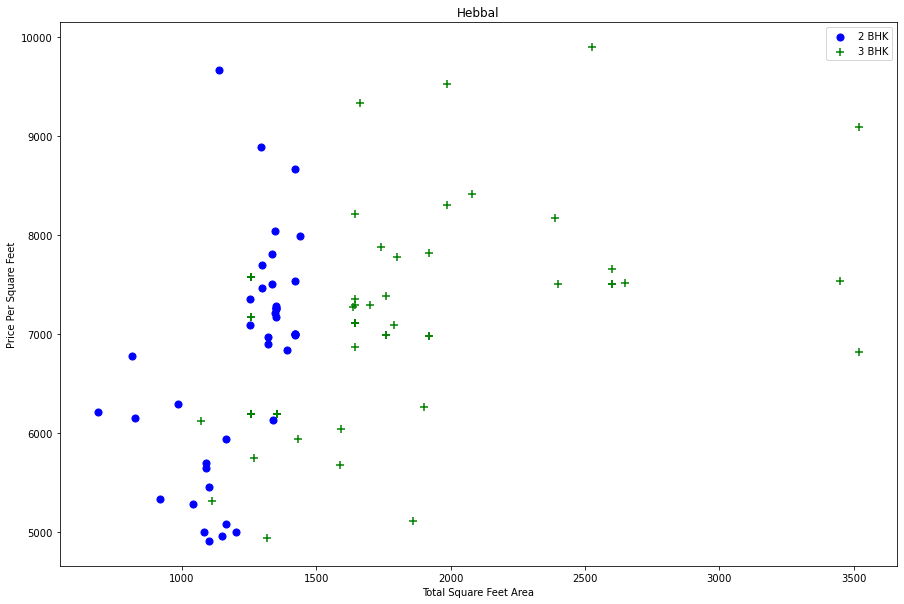

In [41]:
def plot_scatter_chart(df, location):
    bhk2 = df[(df.location==location) & (df.bhk==2)]
    bhk3 = df[(df.location==location) & (df.bhk==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price_per_sqft,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price_per_sqft,marker='+',color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price Per Square Feet")
    plt.title("Price Per Square Feet")
    plt.title(location)
    plt.legend()

plot_scatter_chart(df7,"Hebbal")

In [42]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices, axis='index')

df8 = remove_bhk_outliers(df7)
df8.shape

(7025, 10)

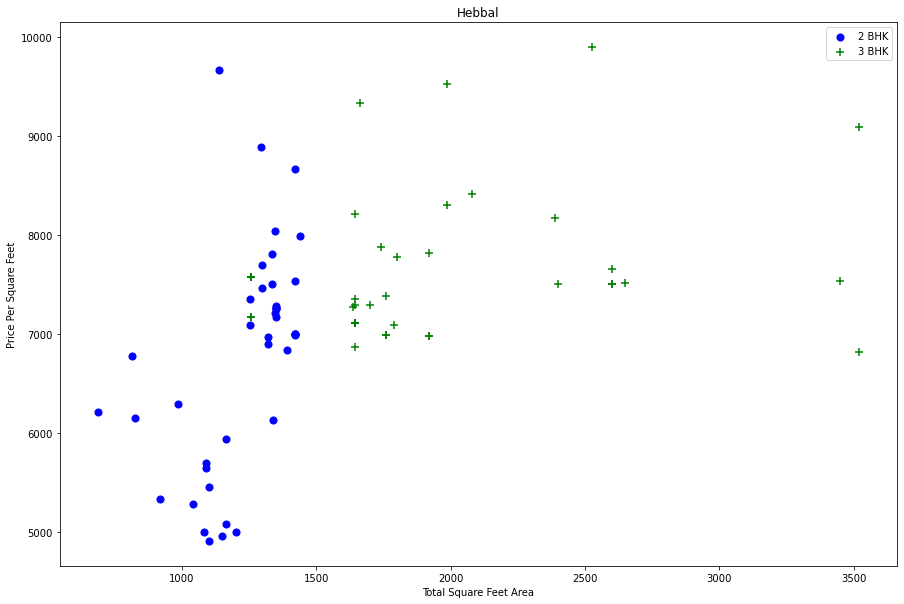

In [43]:
plot_scatter_chart(df8,"Hebbal")

Text(0, 0.5, 'Count')

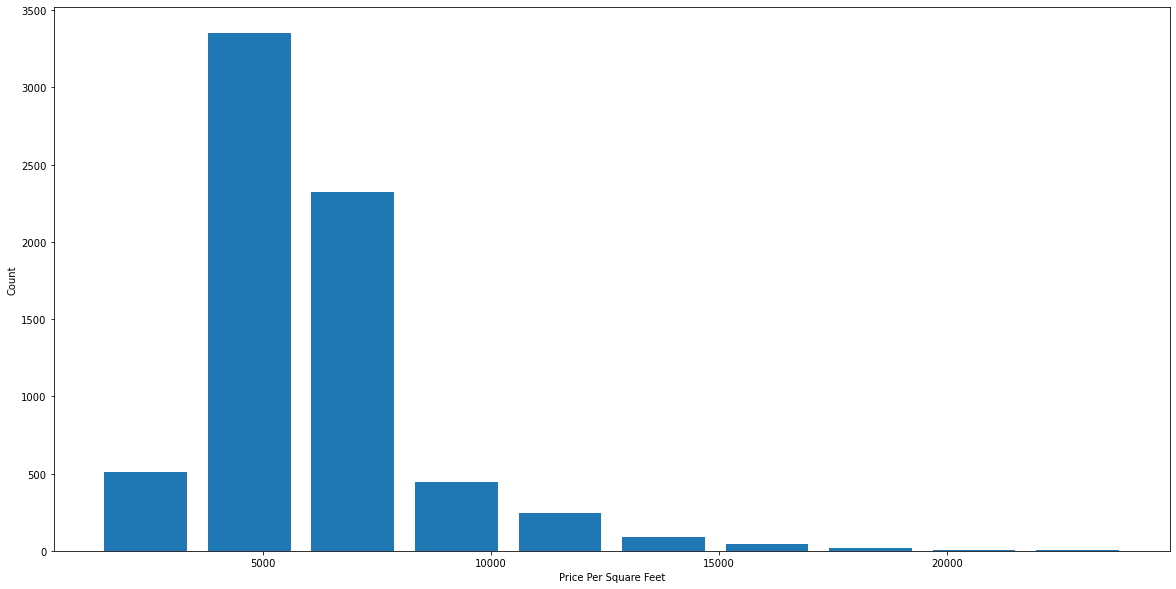

In [44]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (20,10)
plt.hist(df8.price_per_sqft,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

In [45]:
df8.bath.unique()

array([ 4.,  3.,  2.,  8.,  1.,  5.,  6.,  7.,  9., 13.])

# Model Building

In [46]:
dummies = pd.get_dummies(df8.location)
dummies.head(3)

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,AECS Layout,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [47]:
df8[df8.bath>10]

,area_type,availability,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
9269,Super built-up Area,Ready To Move,other,13 BHK,5425.0,13.0,0.0,275.0,13,5069.124424


In [48]:
df9 = df8.drop(['area_type','availability','balcony','size','price_per_sqft'],axis="columns")
df9.head()

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2


In [49]:
df10 = pd.concat([df9,dummies.drop('other',axis='columns')],axis='columns')
df10.head(100)

,location,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.00,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,194.00,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.0,2.0,235.00,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,1200.0,2.0,130.00,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,1235.0,2.0,148.00,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,7th Phase JP Nagar,1175.0,2.0,82.50,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
113,7th Phase JP Nagar,1215.0,2.0,90.00,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
114,7th Phase JP Nagar,1050.0,2.0,75.00,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
115,7th Phase JP Nagar,1300.0,3.0,89.13,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [50]:
df10.shape

(7025, 242)

In [51]:
x = df10.drop(['location','price'],axis='columns')
x.head()

,total_sqft,bath,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [52]:
y = df10.price
y.head()

0    428.0
1    194.0
2    235.0
3    130.0
4    148.0
Name: price, dtype: float64

In [53]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=10)

In [54]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(x_train, y_train)
lr_clf.score(x_test, y_test)

0.7940063229181584

In [55]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(),x,y,cv=cv)

array([0.76442425, 0.85522073, 0.86945271, 0.81986483, 0.87961399])

In [56]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(x,y):
    algos = {
        'linear_regression':{
            'model': LinearRegression(),
            'params':{
                'normalize': [True, False]
            }
        },
        'lasso':{
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection':['random','cyclic']
            }
        },
        'decision-tree':{
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse', 'friedman_mse'],
                'splitter' : ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size = 0.2, random_state=0)
    for algo_name, config in algos.items():
        gs = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(x,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })
    return pd.DataFrame(scores,columns=['model', 'best_score','best_params'])

find_best_model_using_gridsearchcv(x,y)

,model,best_score,best_params
0,linear_regression,0.837715,{'normalize': False}
1,lasso,0.690134,"{'alpha': 1, 'selection': 'random'}"
2,decision-tree,0.744432,"{'criterion': 'friedman_mse', 'splitter': 'ran..."


In [59]:
def predict_price(location,sqft,bath,bhk):
    loc_index = np.where(x.columns==location)[0][0]
    
    z=np.zeros(len(x.columns))
    z[0] = sqft
    z[1] = bath
    z[2] = bhk
    if loc_index >= 0:
        z[loc_index] = 1
    
    return lr_clf.predict([z])[0]

In [60]:
predict_price('1st Block Jayanagar', 2850, 1, 7)

341.9195825979498

In [65]:
predict_price('1st Phase JP Nagar', 1000, 4, 8)

61.41757427976438

In [62]:
predict_price('Whitefield', 2785, 5, 4)

203.52864158999864

In [63]:
import pickle
with open('banglore_home_prices_model.pickle','wb') as f:
    pickle.dump(lr_clf,f)

In [64]:
import json 
columns = {
    'data_columns' : [col.lower() for col in x.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))